In [19]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt # Basic plots
import seaborn as sns   
import json

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Metadata

In [47]:
movies_metadata = pd.read_csv('dataset-1/movies_metadata.csv')
movies_genres = pd.read_csv('dataset-1/movies_metadata_genres.csv')
movies_companies = pd.read_csv('dataset-1/movies_metadata_production_companies.csv')
movies_countries= pd.read_csv('dataset-1/movies_metadata_production_countries.csv')
movies_languages= pd.read_csv('dataset-1/movies_metadata_spoken_languages.csv')

In [21]:
movies_metadata.head()

,Unnamed: 0,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [22]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45463 non-null  int64  
 1   adult                  45463 non-null  bool   
 2   belongs_to_collection  4491 non-null   object 
 3   budget                 45463 non-null  int64  
 4   genres                 45463 non-null  object 
 5   homepage               7779 non-null   object 
 6   id                     45463 non-null  int64  
 7   imdb_id                45446 non-null  object 
 8   original_language      45452 non-null  object 
 9   original_title         45463 non-null  object 
 10  overview               44509 non-null  object 
 11  popularity             45460 non-null  float64
 12  poster_path            45077 non-null  object 
 13  production_companies   45460 non-null  object 
 14  production_countries   45460 non-null  object 
 15  re

In [23]:
movies_metadata.describe()

,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,45463.000000,4.546300e+04,45463.000000,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,22732.134373,4.224579e+06,108359.918813,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,13125.296627,1.742413e+07,112460.749278,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,11365.500000,0.000000e+00,26449.500000,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,22732.000000,0.000000e+00,60003.000000,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,34098.500000,0.000000e+00,157328.000000,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,45465.000000,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [24]:
movies_metadata.count()

Unnamed: 0               45463
adult                    45463
belongs_to_collection     4491
budget                   45463
genres                   45463
homepage                  7779
id                       45463
imdb_id                  45446
original_language        45452
original_title           45463
overview                 44509
popularity               45460
poster_path              45077
production_companies     45460
production_countries     45460
release_date             45376
revenue                  45460
runtime                  45203
spoken_languages         45460
status                   45379
tagline                  20412
title                    45460
video                    45460
vote_average             45460
vote_count               45460
dtype: int64

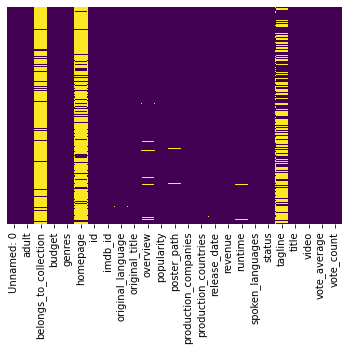

In [25]:
sns.heatmap(movies_metadata.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Eliminamos tagline, homepage y belongs to collection ya que contienen demasiados NAs y no se podrá hacer análisis con esas variables.

In [26]:
movies_metadata.drop('tagline', axis=1, inplace=True)
movies_metadata.drop('homepage', axis=1, inplace=True)
movies_metadata.drop('belongs_to_collection', axis=1, inplace=True)
movies_metadata.head()

,Unnamed: 0,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0


Cambiamos los valores NA's de Overview y Poster path por ceros

In [27]:
movies_metadata['overview'] = movies_metadata['overview'].replace(np.nan, 0)
movies_metadata['poster_path'] = movies_metadata['poster_path'].replace(np.nan, 0)
movies_metadata['popularity'] = movies_metadata['popularity'].replace(np.nan, 0.0)
movies_metadata['status'] = movies_metadata['status'].replace(np.nan, 0)
movies_metadata['runtime'] = movies_metadata['runtime'].replace(np.nan, 0)
movies_metadata.loc[movies_metadata.runtime.isnull(), 'runtime'] = movies_metadata[~movies_metadata.runtime.isnull()].runtime.mean()

La base de datos de metadata no contiene ningún valor de Na's:

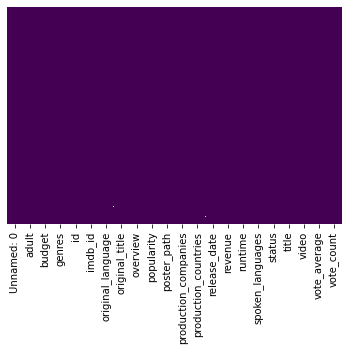

In [28]:
sns.heatmap(movies_metadata.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

A continuación evaluaremos cada variable interesante de metadata:

## Adult

Revisaremos si es una opción dividir el análisis en películas para adultos y el resto:

In [29]:
movies_metadata.adult.value_counts()

False    45454
True         9
Name: adult, dtype: int64

Como podemos observar, la base de datos solamente contiene el género Adult 12 veces, por lo cual, no se podrá hacer un análisis con esta base de datos para el género de películas de adultos, por lo cual, se hará un filtro.

In [30]:
movies_metadata = movies_metadata[movies_metadata['adult'] == 'False']
movies_metadata.adult.value_counts()

Series([], Name: adult, dtype: int64)

In [31]:
movies_metadata.drop('adult', axis=1, inplace=True)

In [32]:
#movies_metadata['genres'] = movies_metadata['genres'].str.replace("\'","\"")
#movies_metadata['production_companies'] = movies_metadata['production_companies'].str.replace("\'","\"")
#movies_metadata['production_countries'] = movies_metadata['production_countries'].str.replace("\'","\"")
#movies_metadata['spoken_languages'] = movies_metadata['spoken_languages'].str.replace("\'","\"")


In [33]:
sample_type = type(movies_metadata["genres"][0])
print(f"The data type before using apply function: {sample_type}\n")


# Columnas que contienen diccionarios
json_cols = ['genres','production_companies', 'production_countries', 'spoken_languages']


def clean_json(x):
    "Create apply function for decoding JSON"
    return json.loads(x)


#Apply the function column wise to each column of interest
for x in json_cols:
    movies_metadata[x] = movies_metadata[x].apply(clean_json)

sample_type2 = type(df["genres"][0])
print(f"The data type after using apply function: {sample_type2}")

KeyError: 0

## Genres

In [34]:
movies_genres.head()

,Unnamed: 0,id,name,parent_id
0,0,16.0,Animation,0
1,1,35.0,Comedy,0
2,2,10751.0,Family,0
3,3,12.0,Adventure,1
4,4,14.0,Fantasy,1


In [35]:
movies_genres_count=movies_genres.groupby('name').count()
movies_genres_count = movies_genres_count.rename(columns = {'Unnamed: 0': 'Count'}, inplace = False)
movies_genres_count['id']=movies_genres_count['Count']/movies_genres_count['Count'].sum()
movies_genres_count = movies_genres_count.rename(columns = {'id': 'Percentage'}, inplace = False)
movies_genres_count=movies_genres_count.sort_values(by='Count',ascending=False)
movies_genres_count

,Count,Percentage,parent_id
name,,,
Drama,20265,0.222463,20265
Comedy,13182,0.144708,13182
Thriller,7624,0.083694,7624
Romance,6735,0.073935,6735
Action,6596,0.072409,6596
Horror,4673,0.051299,4673
Crime,4307,0.047281,4307
Documentary,3932,0.043164,3932
Adventure,3496,0.038378,3496


<AxesSubplot:title={'center':'Géneros'}, xlabel='name'>

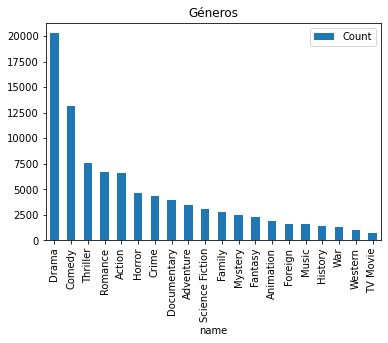

In [36]:
movies_genres_count[['Count']].plot(kind="bar", title="Géneros")

## Languages

In [37]:
movies_languages.head()

,Unnamed: 0,iso_639_1,name,parent_id
0,0,en,English,0
1,1,en,English,1
2,2,fr,Français,1
3,3,en,English,2
4,4,en,English,3


In [38]:
movies_languages_count=movies_languages.groupby('name').count()
movies_languages_count = movies_languages_count.rename(columns = {'Unnamed: 0': 'Count'}, inplace = False)
movies_languages_count['Percentage']=movies_languages_count['Count']/movies_genres_count['Count'].sum()
movies_languages_count=movies_languages_count.sort_values(by='Count',ascending=False)
movies_languages_count=movies_languages_count[['Count','Percentage']]


C:\Users\Alex\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Alex\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Alex\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Alex\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Alex\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Alex\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35805 missing from current

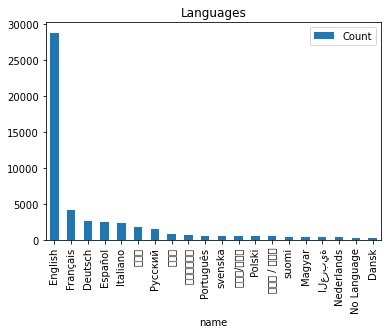

In [89]:
movies_languages_count[['Count']].head(20).plot(kind="bar", title="Languages")
plt.show()

## Popularity

In [49]:
movies_popularity=movies_metadata[['title','popularity']]
movies_popularity.head()

,title,popularity
0,Toy Story,21.946943
1,Jumanji,17.015539
2,Grumpier Old Men,11.712900
3,Waiting to Exhale,3.859495
4,Father of the Bride Part II,8.387519


In [50]:
movies_popularity.describe()

,popularity
count,45460.000000
mean,2.921478
std,6.005414
min,0.000000
25%,0.385948
50%,1.127685
75%,3.678902
max,547.488298


In [82]:
popu = movies_metadata[['popularity']]

No pude pasar las graficas a logaraitmo debido a que hay muchos valores ceranos a 0 que tienden a infinitio al aplicar el log. Así que hice un recorte en popularidad máxima a 10 para preciar la distribución.

In [91]:
popu_recortado = popu[popu.popularity < 10]

In [92]:
popu_recortado.describe()

,popularity
count,42443.000000
mean,2.040118
std,2.441728
min,0.000000
25%,0.348602
50%,0.998151
75%,2.719107
max,9.998415


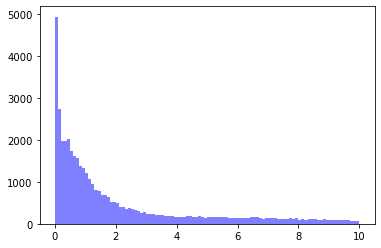

In [93]:
plt.hist(popu_recortado, 100,   facecolor='blue', alpha=0.5)
plt.show()

In [145]:
#Transformación Log/signed

def semi_log(x):
    x = np.sign(x)*np.log(1 + abs(x))
    return x 
    

In [146]:
popu_log = semi_log(popu)

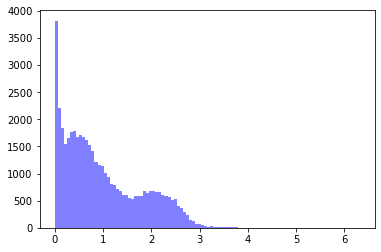

In [147]:
plt.hist(popu_log, 100,   facecolor='blue', alpha=0.5)
plt.show()

## Companies

In [24]:
movies_companies.head()

,Unnamed: 0,name,id,parent_id
0,0,Pixar Animation Studios,3.0,0
1,1,TriStar Pictures,559.0,1
2,2,Teitler Film,2550.0,1
3,3,Interscope Communications,10201.0,1
4,4,Warner Bros.,6194.0,2


In [25]:
movies_companies_count=movies_companies.groupby('name').count()
movies_companies_count= movies_companies_count.rename(columns = {'Unnamed: 0': 'Count'}, inplace = False)
movies_companies_count['Percentage']=movies_companies_count['Count']/movies_genres_count['Count'].sum()
movies_companies_count=movies_companies_count.sort_values(by='Count',ascending=False)
movies_companies_count=movies_companies_count[['Count','Percentage']]
movies_companies_count.head()
 

,Count,Percentage
name,,
Warner Bros.,1250,0.013722
Metro-Goldwyn-Mayer (MGM),1076,0.011812
Paramount Pictures,1003,0.011011
Twentieth Century Fox Film Corporation,836,0.009177
Universal Pictures,830,0.009111


<AxesSubplot:title={'center':'Companies'}, xlabel='name'>

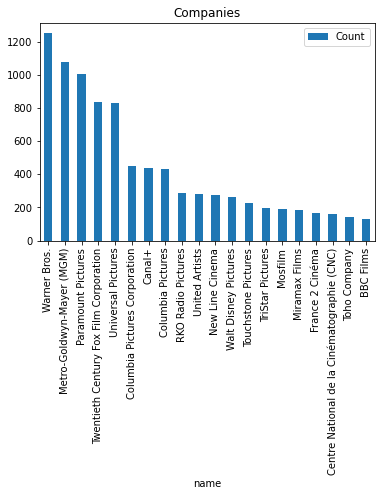

In [26]:
movies_companies_count[['Count']].head(20).plot(kind="bar", title="Companies")

## Countries

In [27]:
movies_countries.head()

,Unnamed: 0,iso_3166_1,name,parent_id
0,0,US,United States of America,0
1,1,US,United States of America,1
2,2,US,United States of America,2
3,3,US,United States of America,3
4,4,US,United States of America,4


In [28]:
movies_countries_count=movies_countries.groupby('name').count()
movies_countries_count= movies_countries_count.rename(columns = {'Unnamed: 0': 'Count'}, inplace = False)
movies_countries_count['Percentage']=movies_countries_count['Count']/movies_genres_count['Count'].sum()
movies_countries_count=movies_countries_count.sort_values(by='Count',ascending=False)
movies_countries_count=movies_countries_count[['Count','Percentage']]
movies_countries_count

,Count,Percentage
name,,
United States of America,21153,0.232211
United Kingdom,4094,0.044943
France,3940,0.043252
Germany,2254,0.024744
Italy,2169,0.023811
...,...,...
Netherlands Antilles,1,0.000011
Cayman Islands,1,0.000011
Guinea,1,0.000011


<AxesSubplot:title={'center':'Countries'}, xlabel='name'>

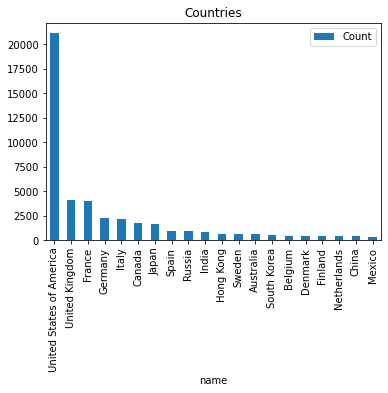

In [29]:
movies_countries_count[['Count']].head(20).plot(kind="bar", title="Countries")

## Revenue

In [95]:
movies_revenue=movies_metadata[['title','revenue']]
movies_revenue=movies_revenue.groupby('title').sum()
movies_revenue=movies_revenue.sort_values(by='revenue',ascending=False)
movies_revenue.head(20)

,revenue
title,
Avatar,2.787965e+09
Star Wars: The Force Awakens,2.068224e+09
Titanic,1.849939e+09
Beauty and the Beast,1.689337e+09
Alice in Wonderland,1.597491e+09
The Avengers,1.568143e+09
Jurassic World,1.513529e+09
Furious 7,1.506249e+09
Avengers: Age of Ultron,1.405404e+09


<AxesSubplot:title={'center':'Countries'}, xlabel='title'>

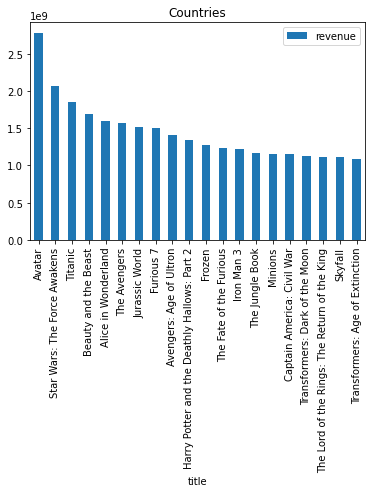

In [96]:
movies_revenue.head(20).plot(kind="bar", title="Countries")

## Distribución de revenue 

<AxesSubplot:ylabel='Frequency'>

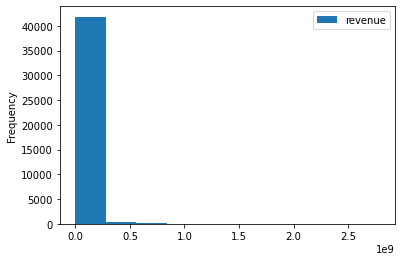

In [104]:
movies_revenue.plot.hist()

De nuevo hay demasiados datos cerca de cero lo cual hace complicado el uso de una escala logarítmica.

In [121]:
movies_revenue.describe()

,revenue
count,4.227700e+04
mean,1.205329e+07
std,6.759506e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.787965e+09


Como el problema de los valores cercanos a cero es molesto, busqué una transformación para lidiar con esto. Encontrando así la transformación Log/signed. [Fuente](https://maxcandocia.com/article/2020/Aug/30/log-scale-zero-and-negative-values/)

In [144]:
#Transformación Log/signed

def semi_log(x):
    x = np.sign(x)*np.log(1 + abs(x))
    return x 

In [124]:
movies_revenue2=movies_metadata[['title','revenue']]
movies_revenue2=movies_revenue.groupby('title').sum()
movies_revenue2=movies_revenue.sort_values(by='revenue',ascending=False)

In [138]:
rev = movies_revenue2[['revenue']]
rev.describe()

,revenue
count,4.227700e+04
mean,1.205329e+07
std,6.759506e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.787965e+09


In [140]:
revlog = semi_log(rev)
revlog.describe()

,revenue
count,42277.000000
mean,2.738595
std,6.157702
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,21.748578


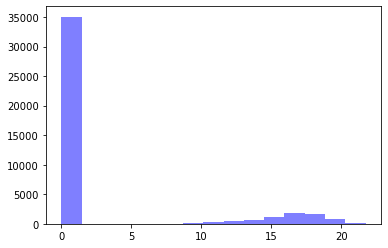

In [164]:
plt.hist(revlog, 15,   facecolor='blue', alpha=0.5)
plt.show()

## Runtime

In [165]:
movies_runtime=movies_metadata[['title','runtime']]
movies_runtime=movies_runtime.groupby('title').sum()
movies_runtime=movies_runtime.sort_values(by='runtime',ascending=False)
movies_runtime.head(20)

,runtime
title,
Les Misérables,1628.0
Hamlet,1469.0
War and Peace,1258.0
Centennial,1256.0
Baseball,1140.0
Jazz,1140.0
The War,1000.0
Taken,970.0
Berlin Alexanderplatz,931.0


<AxesSubplot:title={'center':'Películas con más duración'}, xlabel='title'>

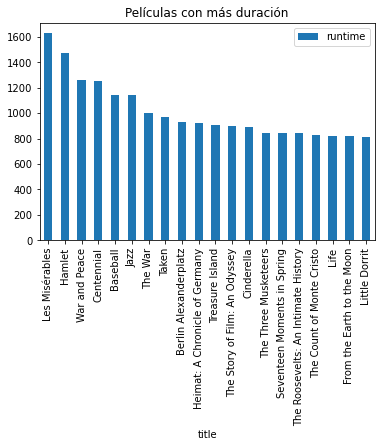

In [166]:
movies_runtime.head(20).plot(kind="bar", title="Películas con más duración")

<AxesSubplot:title={'center':'Películas con menor duración'}, xlabel='title'>

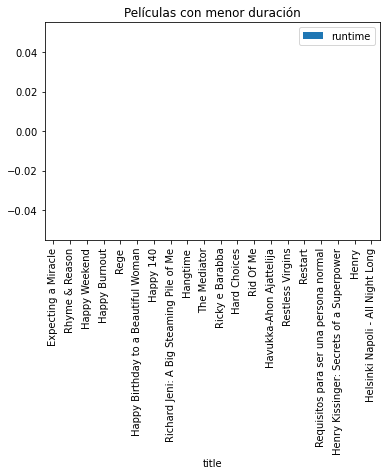

In [172]:
movies_runtime.sort_values(by='runtime',ascending=True).head(20).plot(kind="bar", title="Películas con menor duración")

## Distribución run time

<AxesSubplot:ylabel='Frequency'>

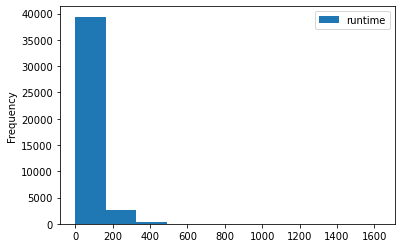

In [173]:
movies_runtime.plot.hist()

In [174]:
run = movies_runtime.runtime


In [175]:
run_log = semi_log(run)

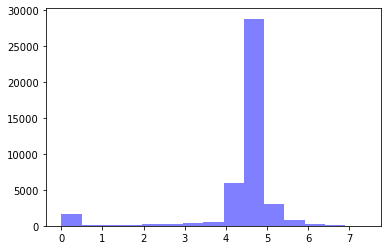

In [176]:
plt.hist(run_log, 15,   facecolor='blue', alpha=0.5)
plt.show()

## Releace date

In [211]:
date = movies_metadata.release_date

year = []
for i in date:
    if type(i) == str: #hay fechas que no son strings 
        year.append(i[0:4])

year.sort()

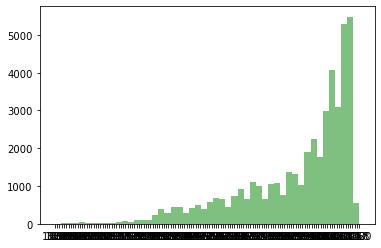

In [212]:
plt.hist(year, 50,   facecolor='green', alpha=0.5)
plt.show()